In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pickle

import matplotlib.pyplot as plt
from scipy import stats

In [3]:
data = pd.read_csv("student-mat.csv", sep=";")

data = data[["G1", "G2", "G3", "absences", "failures", "studytime"]]

predict = "G3"

# train 100 times until best model is gotten
best = 0
for _ in range(100):
    X = data.drop(columns=[predict])
    y = data[predict]

    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model = LinearRegression()
    model.fit(X_train, y_train)

    score = model.score(X_test, y_test)
    if score > best :
        best = score
        pickle.dump(model, open("studentmodel.pickle", "wb"))
best

0.9149431310327248

In [4]:
# load saved model and make predictions
model = pickle.load(open("studentmodel.pickle", "rb"))
predictions = model.predict(X_test)

# for x in range(len(predictions)):
    # print(predictions[x], y_test[x]) 

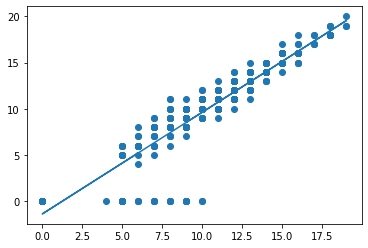

In [5]:
# plot a graph to show relationship between G3 and other variables 
x_value = "G2"

slope, intercept, r, p, std_err = stats.linregress(data[x_value], y)

def line(x):
    return slope * x + intercept

graph_y = list(map(line, data[x_value]))

plt.scatter(data[x_value], y)
plt.plot(data[x_value], graph_y)